## Xử lý address

In [1]:
import pandas as pd 

dataset = pd.read_csv('vietnam_housing_dataset_final.csv')
cell_filter = pd.read_csv('vietnam_grid_5s.csv')



In [2]:
dataset.head()
# check null values
dataset.isnull().sum()


Address                  0
Area                     0
Frontage             11563
Access Road          13296
House direction      21238
Balcony direction    24982
Floors                3603
Bedrooms              5162
Bathrooms             7073
Legal status          4506
Furniture state      14119
Price                    0
longitude              385
latitude               385
price_per_m2             0
dtype: int64

In [3]:
cell_filter.head()


,lat,log,quantity,total_price
0,10.366667,106.350000,1.0,0.014900
1,10.500000,107.166667,1.0,0.096203
2,10.900000,106.800000,15.0,1.018669
3,10.950000,106.600000,2.0,0.060135
4,10.966667,106.466667,6.0,0.338310


In [4]:
dataset = dataset.dropna(subset=['latitude', 'longitude'])

dataset.isna().sum()

Address                  0
Area                     0
Frontage             11397
Access Road          13107
House direction      21020
Balcony direction    24692
Floors                3511
Bedrooms              5034
Bathrooms             6920
Legal status          4425
Furniture state      13861
Price                    0
longitude                0
latitude                 0
price_per_m2             0
dtype: int64

In [5]:
cell_filter.isna().sum()

lat            0
log            0
quantity       0
total_price    0
dtype: int64

In [6]:
# Rename 'log' column to 'lon' in cell_filter for clarity
cell_filter = cell_filter.rename(columns={'log': 'lon'})

# Create a new column 'avg_price' in cell_filter
cell_filter['avg_price'] = cell_filter['total_price'] / cell_filter['quantity']

# Create a new dataset with replaced coordinates
dataset_with_avg_price = dataset.copy()

# Define a small epsilon for coordinate matching (0.00001389 as specified)
epsilon = 0.00001389

# Function to find avg_price for given lat/lon coordinates
def get_avg_price(lat, lon):
    matches = cell_filter[(cell_filter['lat'] <= lat) & (lat <= cell_filter['lat'] + epsilon) & 
                         (cell_filter['lon'] <= lon) & (lon <= cell_filter['lon'] + epsilon)]
    
    if len(matches) > 0:
        return matches['avg_price'].mean()
    else:
        return cell_filter['avg_price'].mean()

# Apply function to each row to get avg_price
dataset_with_avg_price['avg_price'] = dataset_with_avg_price.apply(
    lambda row: get_avg_price(row['latitude'], row['longitude']), axis=1)

# Show how many coordinates were matched
print(f"Coordinates with matching avg_price: {dataset_with_avg_price['avg_price'].count()}")
print(f"Total coordinates: {len(dataset_with_avg_price)}")


# Display the first few rows of the updated dataset
dataset_with_avg_price.head()

Coordinates with matching avg_price: 29841
Total coordinates: 29841


,Address,Area,Frontage,Access Road,House direction,Balcony direction,Floors,Bedrooms,Bathrooms,Legal status,Furniture state,Price,longitude,latitude,price_per_m2,avg_price
0,"Dự án The Empire - Vinhomes Ocean Park 2, Xã L...",84.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,Have certificate,NaN,8.60,106.054036,20.656841,0.102381,0.118496
1,"Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...",60.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,7.50,106.054036,20.656841,0.125000,0.118496
2,"Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...",90.0,6.0,13.0,Đông - Bắc,Đông - Bắc,5.0,NaN,NaN,Sale contract,NaN,8.90,106.054036,20.656841,0.098889,0.118496
3,"Đường Nguyễn Văn Khối, Phường 11, Gò Vấp, Hồ C...",54.0,NaN,3.5,Tây - Nam,Tây - Nam,2.0,2.0,3.0,Have certificate,Full,5.35,106.649372,10.843596,0.099074,0.113096
4,"Đường Quang Trung, Phường 8, Gò Vấp, Hồ Chí Minh",92.0,NaN,NaN,Đông - Nam,Đông - Nam,2.0,4.0,4.0,Have certificate,Full,6.90,106.646268,10.840036,0.075000,0.107876


## Drop columns:  latitude, longitude, Address, price_per_m2 House direction, Balcony direction, Frontage, Access Road

In [7]:
dataset_with_avg_price.columns

Index(['Address', 'Area', 'Frontage', 'Access Road', 'House direction',
       'Balcony direction', 'Floors', 'Bedrooms', 'Bathrooms', 'Legal status',
       'Furniture state', 'Price', 'longitude', 'latitude', 'price_per_m2',
       'avg_price'],
      dtype='object')

In [8]:
dataset_with_avg_price.drop(columns=['latitude', 'longitude', 'Address', 'price_per_m2'], inplace=True)

In [9]:
dataset_with_avg_price.columns

Index(['Area', 'Frontage', 'Access Road', 'House direction',
       'Balcony direction', 'Floors', 'Bedrooms', 'Bathrooms', 'Legal status',
       'Furniture state', 'Price', 'avg_price'],
      dtype='object')

In [10]:
dataset_with_avg_price = dataset_with_avg_price.drop(['House direction', 'Balcony direction', 'Frontage', 'Access Road'], axis=1, errors='ignore')
dataset_with_avg_price.isnull().sum()

Area                   0
Floors              3511
Bedrooms            5034
Bathrooms           6920
Legal status        4425
Furniture state    13861
Price                  0
avg_price              0
dtype: int64

In [11]:
mean_floor = dataset_with_avg_price['Floors'].mean()
dataset_with_avg_price['Floors'] = dataset_with_avg_price['Floors'].fillna(mean_floor)
dataset_with_avg_price.isnull().sum()

Area                   0
Floors                 0
Bedrooms            5034
Bathrooms           6920
Legal status        4425
Furniture state    13861
Price                  0
avg_price              0
dtype: int64

## Xử lý missing phòng tắm

Số lượng dữ liệu có Bedrooms > 1 là: 24807


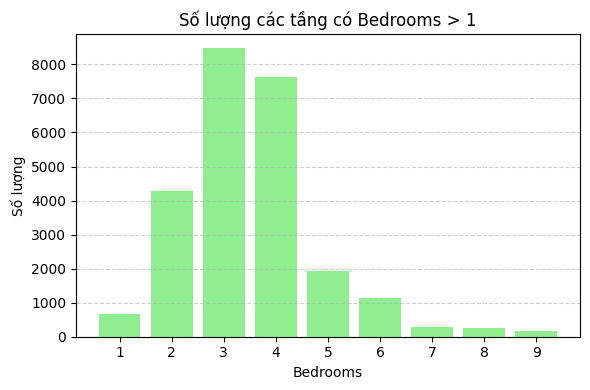

np.float64(3.507276172048212)

In [12]:
import matplotlib.pyplot as plt

filtered_df = dataset_with_avg_price[dataset_with_avg_price['Bedrooms'] >= 1]

# Đếm số lượng mỗi tầng (sau khi lọc)
floor_counts = filtered_df['Bedrooms'].value_counts().sort_index()

# In số lượng dòng thỏa điều kiện > 1
print(f"Số lượng dữ liệu có Bedrooms > 1 là: {len(filtered_df)}")

plt.figure(figsize=(6, 4))
plt.bar(floor_counts.index, floor_counts.values, color='lightgreen')
plt.xlabel('Bedrooms')
plt.ylabel('Số lượng')
plt.title('Số lượng các tầng có Bedrooms > 1')
plt.xticks(floor_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
dataset_with_avg_price['Bedrooms'].mean()


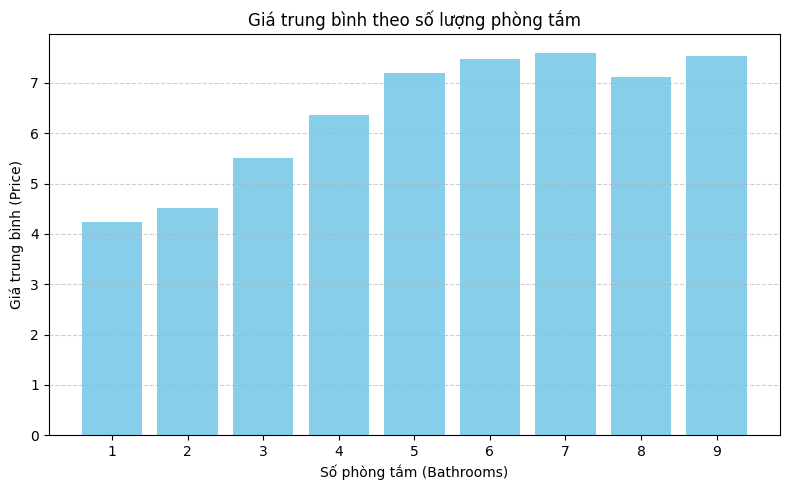

In [13]:
import matplotlib.pyplot as plt

# Nhóm theo số lượng phòng tắm, tính giá trung bình
avg_price_by_bathroom = dataset_with_avg_price.groupby('Bathrooms')['Price'].mean().sort_index()

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 5))
plt.bar(avg_price_by_bathroom.index, avg_price_by_bathroom.values, color='skyblue')

plt.xlabel('Số phòng tắm (Bathrooms)')
plt.ylabel('Giá trung bình (Price)')
plt.title('Giá trung bình theo số lượng phòng tắm')
plt.xticks(avg_price_by_bathroom.index)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [14]:
import numpy as np
condlist = [
    (dataset_with_avg_price['Bathrooms'].isna()) & (dataset_with_avg_price['Price'] < 4),
    (dataset_with_avg_price['Bathrooms'].isna()) & (dataset_with_avg_price['Price'] >= 4) & (dataset_with_avg_price['Price'] < 5),
    (dataset_with_avg_price['Bathrooms'].isna()) & (dataset_with_avg_price['Price'] >= 5) & (dataset_with_avg_price['Price'] < 6),
    (dataset_with_avg_price['Bathrooms'].isna()) & (dataset_with_avg_price['Price'] >= 6)
]

choicelist = [1, 2, 3, 4]

dataset_with_avg_price['Bathrooms'] = np.select(condlist, choicelist, default=dataset_with_avg_price['Bathrooms'])
print(dataset_with_avg_price.isnull().sum())


Area                   0
Floors                 0
Bedrooms            5034
Bathrooms              0
Legal status        4425
Furniture state    13861
Price                  0
avg_price              0
dtype: int64


## Xử lý missing phòng ngủ

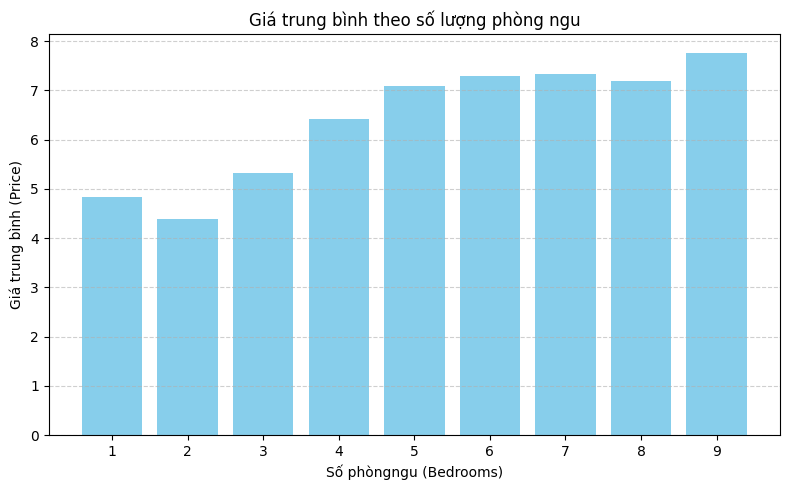

In [15]:
avg_price_by_bathroom = dataset_with_avg_price.groupby('Bedrooms')['Price'].mean().sort_index()

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 5))
plt.bar(avg_price_by_bathroom.index, avg_price_by_bathroom.values, color='skyblue')

plt.xlabel('Số phòngngu (Bedrooms)')
plt.ylabel('Giá trung bình (Price)')
plt.title('Giá trung bình theo số lượng phòng ngu')
plt.xticks(avg_price_by_bathroom.index)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [16]:
dataset_with_avg_price = dataset_with_avg_price.dropna(subset=['Bedrooms'])
print(dataset_with_avg_price.columns.tolist())
print(dataset_with_avg_price.isnull().sum())


['Area', 'Floors', 'Bedrooms', 'Bathrooms', 'Legal status', 'Furniture state', 'Price', 'avg_price']
Area                  0
Floors                0
Bedrooms              0
Bathrooms             0
Legal status       2715
Furniture state    9872
Price                 0
avg_price             0
dtype: int64


## Xử lý Legal status, Furniture state

In [17]:

furniture_state_counts = dataset_with_avg_price['Furniture state'].value_counts()
print(furniture_state_counts)

Furniture state
Full     9867
Basic    5068
Name: count, dtype: int64


In [18]:
# split to 3 columns with value 0 , 1 
dataset_with_avg_price['Furniture state'] = dataset_with_avg_price['Furniture state'].str.lower()
dataset_with_avg_price['Furniture state'] = dataset_with_avg_price['Furniture state'].replace({
    'full': 1,
    'basic': 0.5,
})

dataset_with_avg_price['Furniture state'] = dataset_with_avg_price['Furniture state'].fillna(0)


/var/folders/tf/fngz35997ng7b3kcf57tsz700000gn/T/ipykernel_35721/3237476108.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset_with_avg_price['Furniture state'] = dataset_with_avg_price['Furniture state'].replace({


In [19]:
furniture_state_counts = dataset_with_avg_price['Furniture state'].value_counts()
print(furniture_state_counts)

Furniture state
0.0    9872
1.0    9867
0.5    5068
Name: count, dtype: int64


In [20]:
legal_status_counts = dataset_with_avg_price['Legal status'].value_counts()
print(legal_status_counts)

Legal status
Have certificate    21430
Sale contract         662
Name: count, dtype: int64


In [21]:
# split the 'Legal status' column into two new columns
dataset_with_avg_price['Legal_status_NAN'] = dataset_with_avg_price['Legal status'].isna().astype(int)
dataset_with_avg_price['Legal_status_have_certificate'] = dataset_with_avg_price['Legal status'].apply(lambda x: 1 if x == 'Have certificate' else 0)
dataset_with_avg_price['Legal_status_sales_contract'] = dataset_with_avg_price['Legal status'].apply(lambda x: 1 if x == 'Sale contract' else 0)
dataset_with_avg_price = dataset_with_avg_price.drop(columns=['Legal status'], errors='ignore')
print(dataset_with_avg_price.isnull().sum())



Area                             0
Floors                           0
Bedrooms                         0
Bathrooms                        0
Furniture state                  0
Price                            0
avg_price                        0
Legal_status_NAN                 0
Legal_status_have_certificate    0
Legal_status_sales_contract      0
dtype: int64


In [22]:
dataset_with_avg_price.head()

,Area,Floors,Bedrooms,Bathrooms,Furniture state,Price,avg_price,Legal_status_NAN,Legal_status_have_certificate,Legal_status_sales_contract
3,54.0,2.0,2.0,3.0,1.0,5.35,0.113096,0,1,0
4,92.0,2.0,4.0,4.0,1.0,6.90,0.107876,0,1,0
7,74.0,5.0,4.0,5.0,0.0,9.90,0.065928,0,1,0
8,48.0,5.0,6.0,3.0,0.5,5.70,0.118496,1,0,0
10,80.0,5.0,6.0,6.0,0.0,10.00,0.118496,0,1,0


In [23]:
# export file dataset csv
dataset_with_avg_price.to_csv('data_train.csv', index=False)